# 1. Import Necessary Libraries

In [68]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_curve, auc,classification_report,accuracy_score
from sklearn.metrics import mean_squared_error ,mean_absolute_error,log_loss
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

# 2. Read In and Explore the Data

In [69]:
#converting into dataframe
df = pd.read_csv('baseball.csv')

In [70]:
df.shape

(30, 17)

In [71]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [72]:
#Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts,Stolen Bases, Runs Allowed, 
#Earned Runs, Earned Run Average (ERA), Shutouts, Saves, and Errors

In [28]:
df.head(10)

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


### Imputing Missing Values with Medians

In [29]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [75]:
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

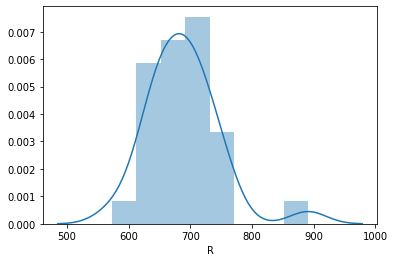

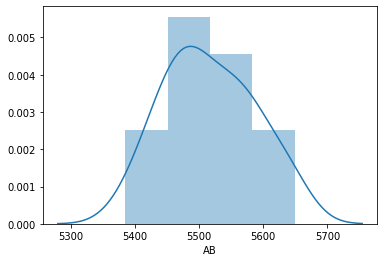

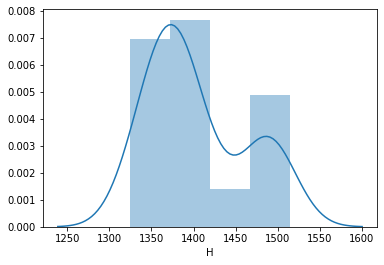

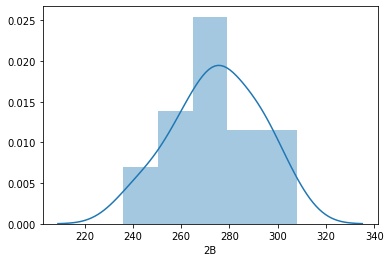

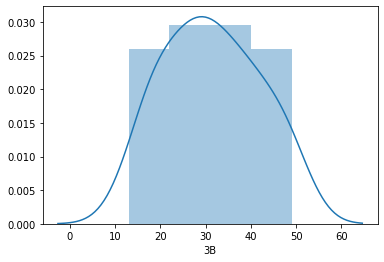

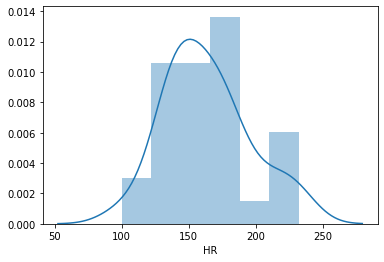

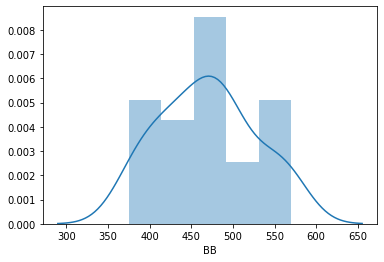

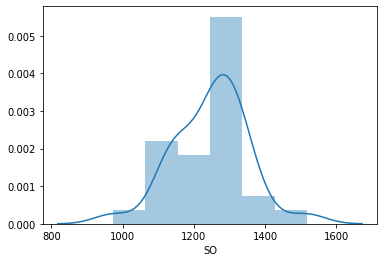

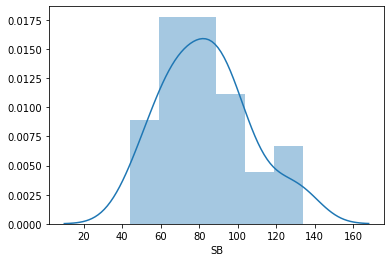

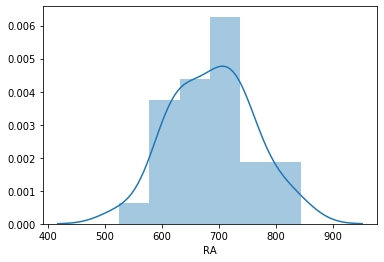

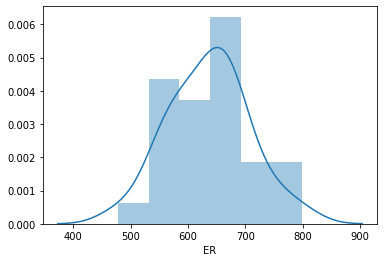

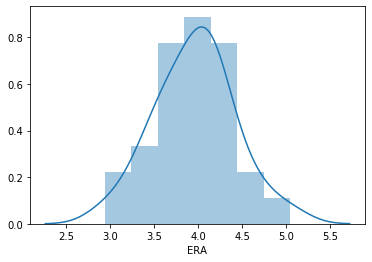

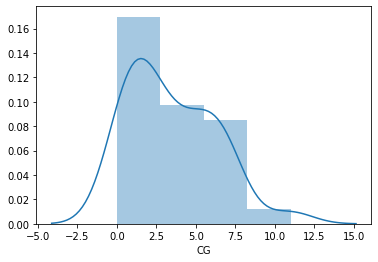

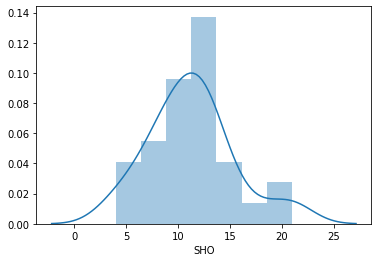

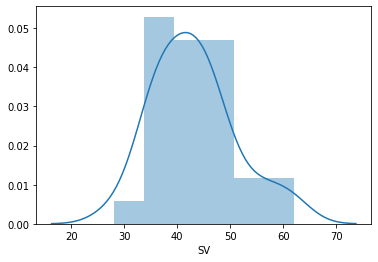

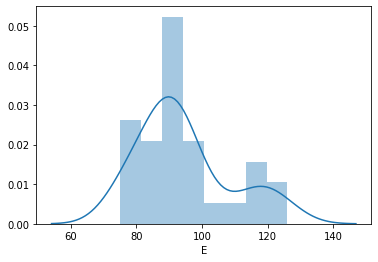

In [76]:
components=df.drop(['W'],axis=1).columns
for comp in components:
    sns.distplot(df[comp])
    plt.show()

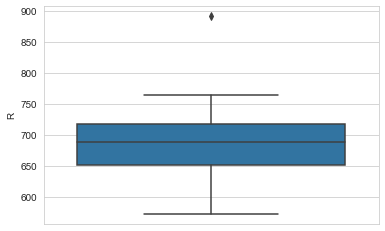

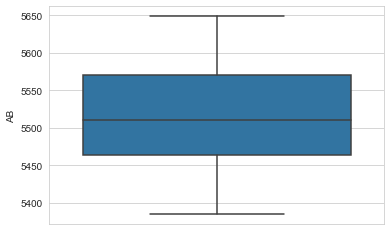

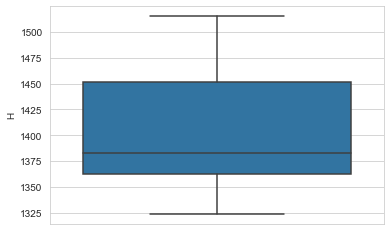

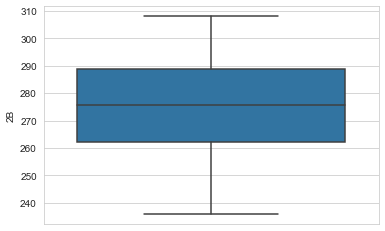

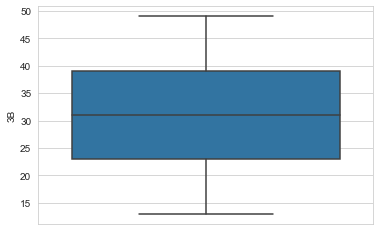

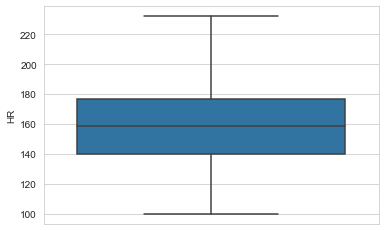

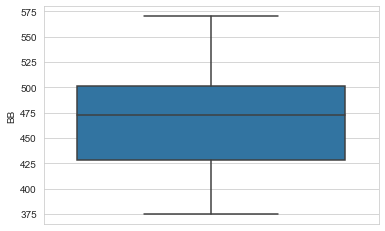

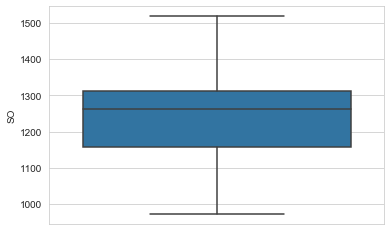

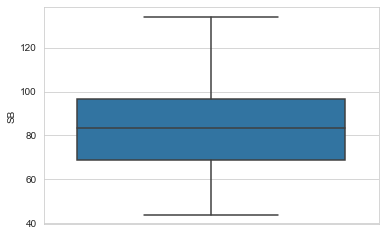

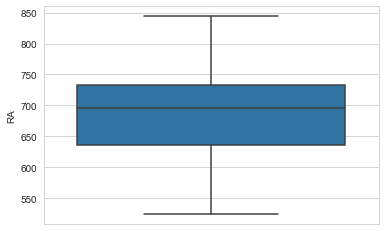

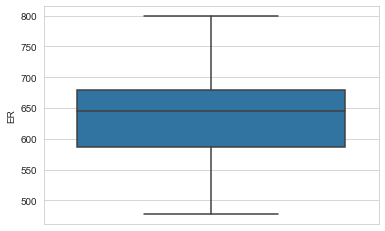

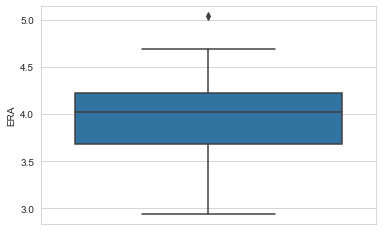

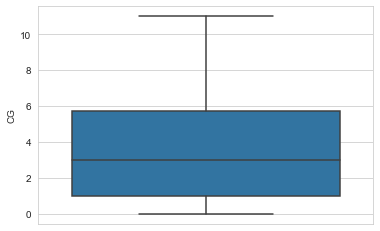

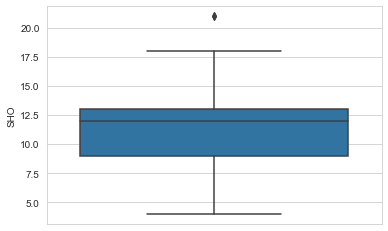

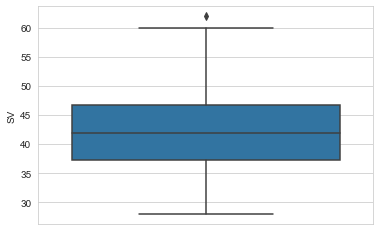

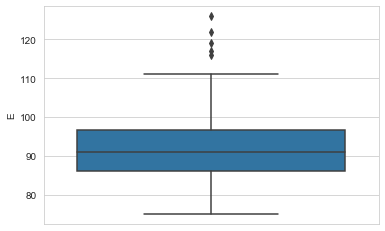

In [67]:
components=df.drop(['W'],axis=1).columns
for comp in components:
        sns.boxplot(y=comp,data=df)
        plt.show()

There are few ouliers in error feature

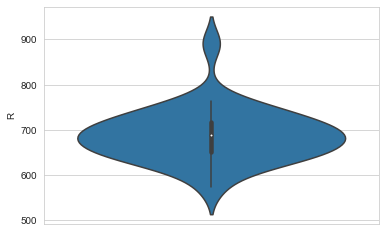

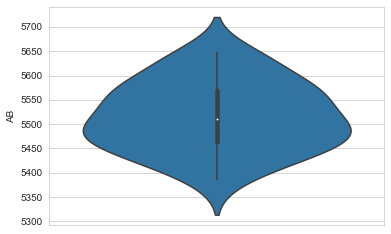

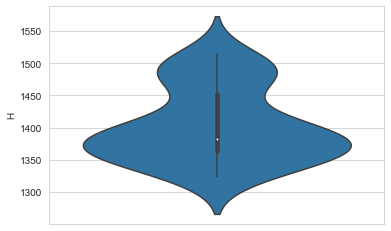

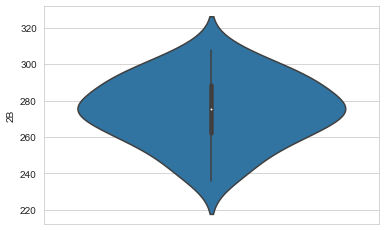

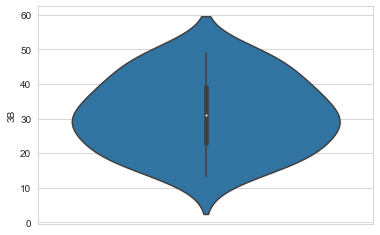

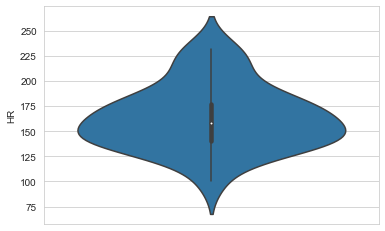

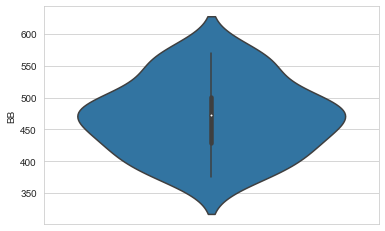

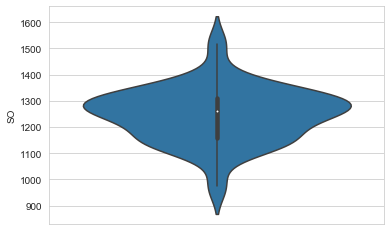

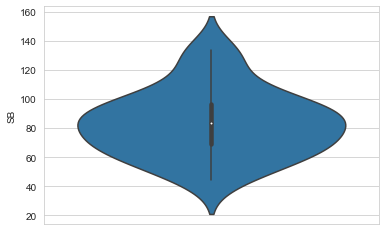

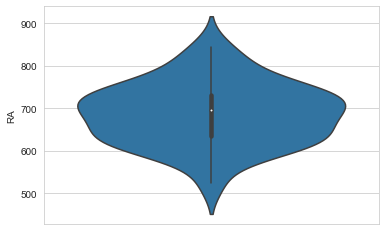

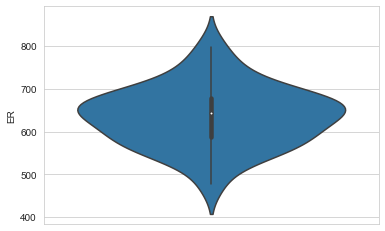

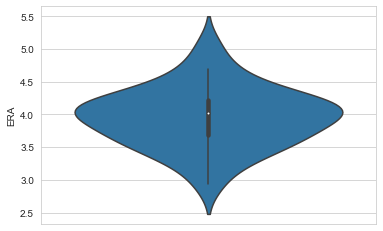

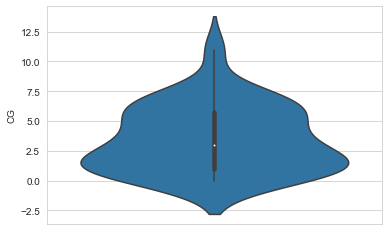

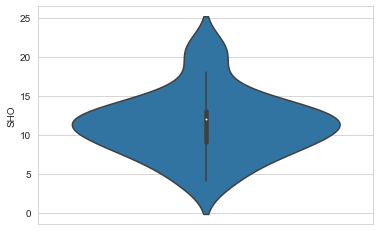

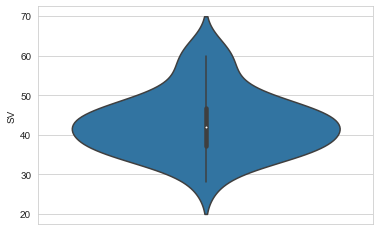

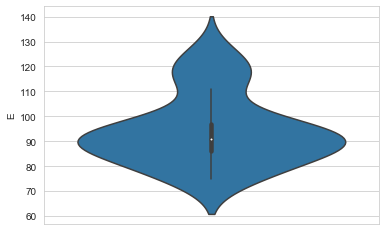

In [68]:
components=df.drop(['W'],axis=1).columns
for comp in components:
        sns.violinplot(y=comp,data=df)
        plt.show()

All features seems mostly normal

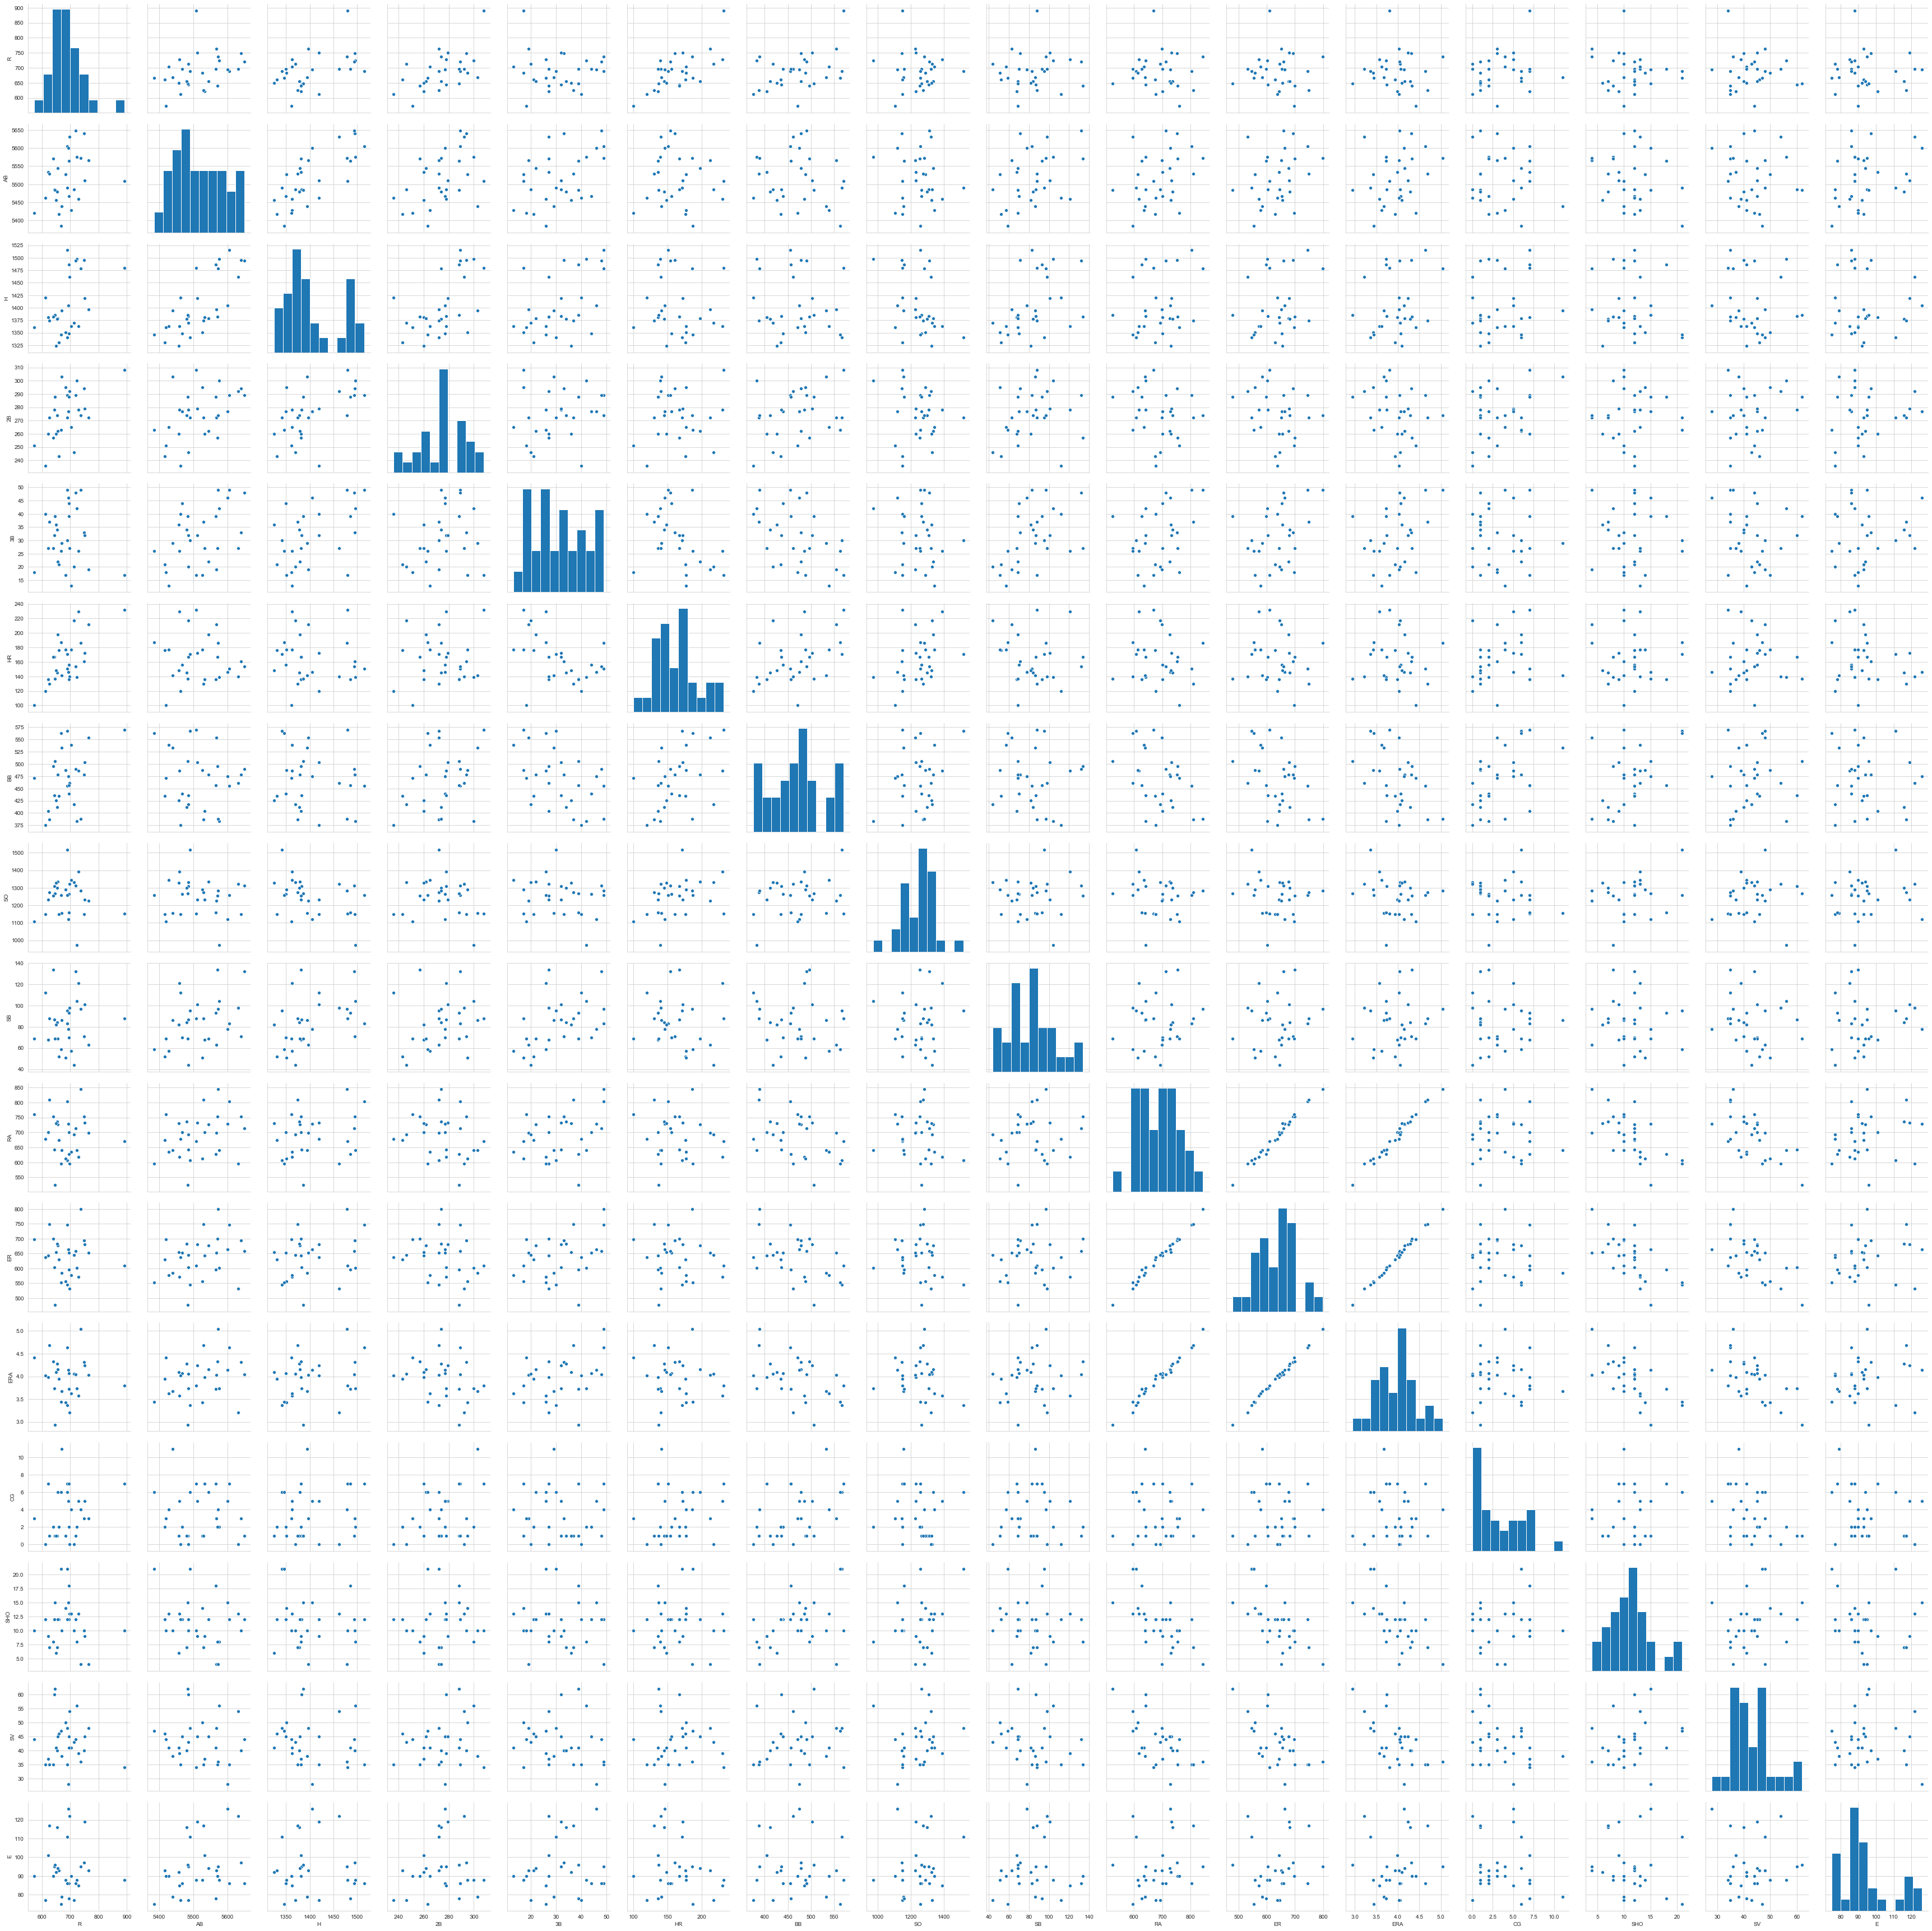

In [14]:
components=df.drop(['W'],axis=1).columns

sns.set_style("whitegrid");               #Step1:Set the gird to white.
sns.pairplot(df,vars=components ,height=3); #.pairplot(dataset,hue='',size=n) function to plot pairplot
plt.show()

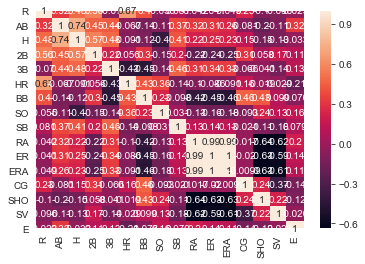

In [15]:
corr=df.drop(['W'],axis=1).corr()
sns.heatmap(corr, annot=True)

Summary:<br>
The only co-relation we see is between Runs allowed and Earned Runs

# 4. Data pre-processing and cleaning

## A.Converting all features to numerical features 

In [7]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


## B.Removing Outliers

In [73]:
from scipy import stats
z=abs(stats.zscore(df))
print(np.where(z>3))
df=df[(z<3).all(axis=1)]

(array([5], dtype=int64), array([1], dtype=int64))


## B. Normalize all features

In [57]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
normalizer.fit(df)
df_tran=normalizer.transform(df)

In [59]:
df = pd.DataFrame(df_tran,columns=df.columns)#.drop(['W'],axis=1)

In [61]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,0.015866,0.120913,0.931067,0.250010,0.050102,0.007014,0.023214,0.063964,0.162498,0.017369,0.107052,0.100372,0.000623,0.000334,0.001336,0.009352,0.014697
1,0.014025,0.117606,0.923781,0.227946,0.046806,0.007435,0.026360,0.074180,0.213583,0.011828,0.118282,0.110340,0.000688,0.000338,0.002028,0.007604,0.014532
2,0.013794,0.113924,0.926210,0.237555,0.051598,0.004938,0.024011,0.090765,0.197026,0.014645,0.108986,0.099450,0.000625,0.001873,0.001703,0.006471,0.013453
3,0.012738,0.104247,0.927326,0.231454,0.043576,0.004525,0.022793,0.067710,0.206315,0.011397,0.117487,0.107766,0.000667,0.001173,0.001508,0.006201,0.016928
4,0.012115,0.112800,0.917629,0.248030,0.047314,0.008022,0.024721,0.074491,0.206119,0.013588,0.131464,0.122132,0.000760,0.001146,0.001965,0.005730,0.014080


## D. Train_Test split

In [74]:
y=df['W']
x=df.drop(['W'],axis=1)

In [75]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.50,random_state=42)

In [64]:
round(y_train, 2)

5     0.01
2     0.01
24    0.02
3     0.01
23    0.01
25    0.01
18    0.01
28    0.01
20    0.01
7     0.01
10    0.01
14    0.02
19    0.02
6     0.01
Name: W, dtype: float64

# 5. Building Models

# Model1 : KNN

In [76]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor()

parameters = {'n_neighbors': range(1,10,1)}

clf = GridSearchCV(neigh, parameters, cv= 5)

clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='warn', n_jobs=None, param_grid={'n_neighbors': range(1, 10)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [77]:
clf.best_params_

{'n_neighbors': 3}

In [78]:
#KNN classifier sklearn : https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

neigh = KNeighborsRegressor(n_neighbors=3)
neigh.fit(X_train, y_train)

y_test_pred = neigh.predict(X_test)
print(r2_score(y_test,y_test_pred))


0.3745036305877014


# Model 2 : Logistic Regression 

In [37]:
#Its a regression problem so can't apply

# Model 3 : Linear regression 

In [38]:
from sklearn.linear_model import LinearRegression
Lr = LinearRegression()
Lr.fit(X_train, y_train)

y_test_pred = Lr.predict(X_test)

print(r2_score(y_test,y_test_pred))

0.1450886465759592


# Model 4 : SVM

In [39]:
from sklearn.svm import SVR

parameters = [{'C': [0.0001,0.01, 0.1, 1, 10, 100],  
              'gamma': [0.1,1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}]   #'poly','sigmoid' takes too much time

model = GridSearchCV(SVR(),parameters, cv=5)
model.fit(X_train, y_train)    

print(model.best_estimator_)
print(model.score(X_train, y_train))

SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.0001,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
0.9999031583836332


In [40]:
model.best_params_

{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}

In [41]:
from sklearn.svm import SVR

clf = SVR(C=0.0001,gamma=0.1,kernel= 'rbf')

clf.fit(X_train, y_train)

y_test_pred = clf.predict(X_test)

print(r2_score(y_test,y_test_pred))

-0.035781143635125856


# Model 5 : Decision Tree

In [42]:
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor


parameters = {'max_depth': [5, 10, 50, 100]}

clf = DecisionTreeRegressor(criterion='mse')

model = GridSearchCV(clf,parameters,cv=3)

model.fit(X_train, y_train)    

print(model.best_estimator_)
print(model.score(X_train, y_train))


DecisionTreeRegressor(criterion='mse', max_depth=100, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')
1.0


In [43]:
model.best_params_

{'max_depth': 100}

# Traning with best hyperparameters

In [46]:
clf = DecisionTreeRegressor(criterion='mse',max_depth=3,min_samples_split=2)

clf.fit(X_train, y_train)


y_test_pred = clf.predict(X_test)

print(r2_score(y_test,y_test_pred))

0.2929628999319266


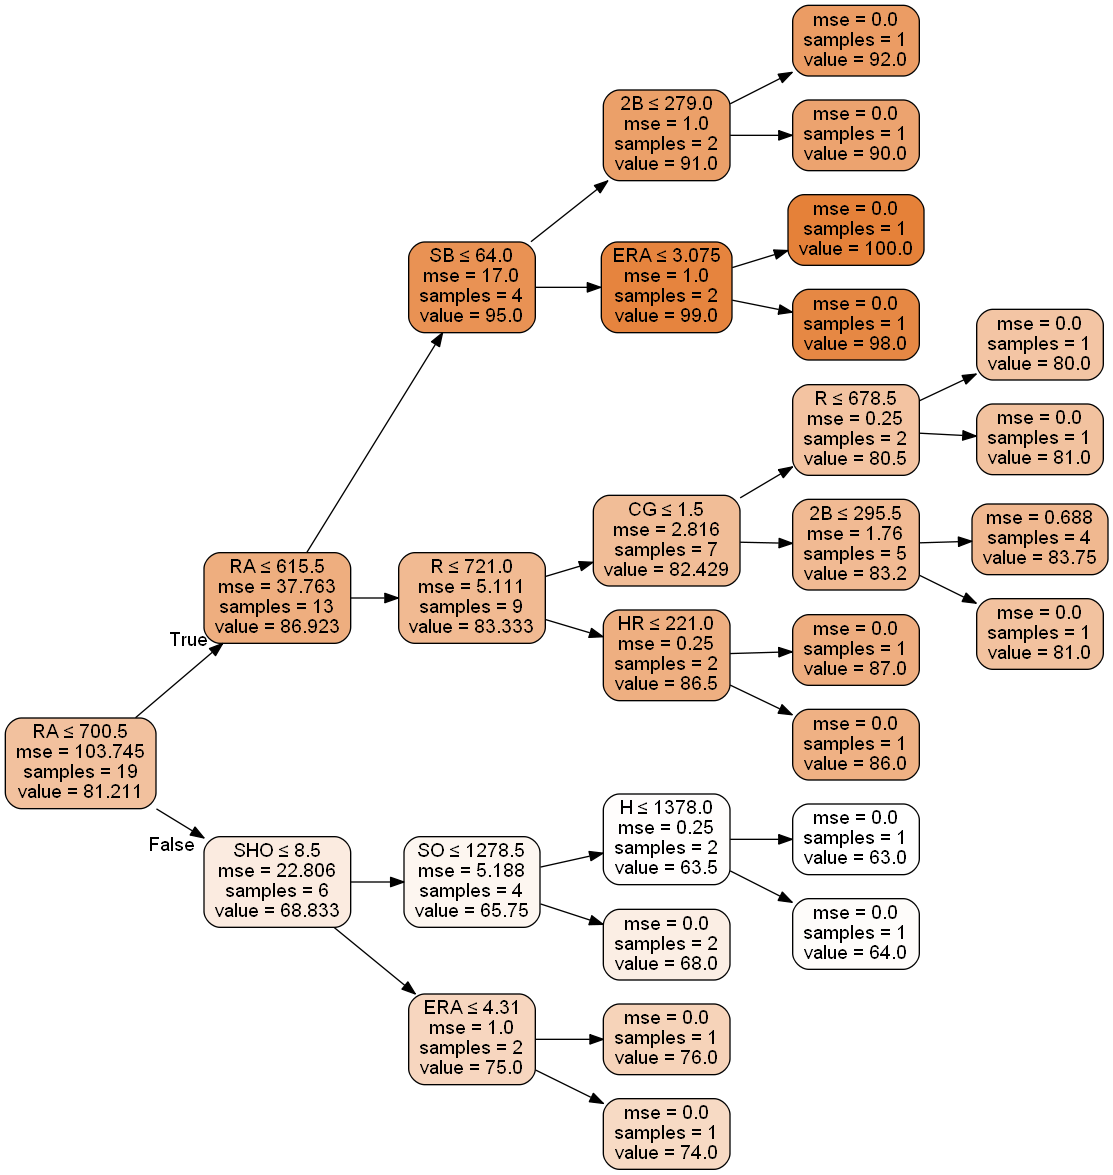

In [125]:
#https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html
import pydotplus
from sklearn.tree import export_graphviz
from IPython.display import Image
from sklearn.externals.six import StringIO

dot_data = StringIO()

export_graphviz(clf, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names=X_train.columns,rotate=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

Image(graph.create_png())

# Model 6 : Ensemble Techniques 

## A. Bagging

In [47]:
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor


parameters = {'max_depth': [5, 10, 50, 100],'n_estimators':[10, 20 , 50, 100]}
RF = RandomForestRegressor( criterion='mse')

model = GridSearchCV(RF,parameters, cv=3)

model.fit(X_train, y_train)    

print(model.best_estimator_)
print(model.score(X_train, y_train))


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=50,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=20,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)
0.9274479707350831


In [48]:
from sklearn.model_selection import GridSearchCV

RF=RandomForestRegressor(max_depth=50,n_estimators=10,criterion='mse' )
RF.fit(X_train, y_train)

y_test_pred = RF.predict(X_test)

print(r2_score(y_test,y_test_pred))

0.5187861640571819


# Boosting

In [49]:
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor


parameters = {'max_depth': [5, 10, 50, 100],'n_estimators':[10, 20 , 50, 100]}

clf = GradientBoostingRegressor()

model = GridSearchCV(clf,parameters, cv=3)

model.fit(X_train, y_train)    

print(model.best_estimator_)
print(model.score(X_test, y_test))


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
0.6811208022136179


In [50]:
from sklearn.model_selection import GridSearchCV

clf=GradientBoostingRegressor(max_depth=5,n_estimators=100)
clf.fit(X_train, y_train)

y_test_pred = clf.predict(X_test)

print(r2_score(y_test,y_test_pred))

0.7324456929352663


## Note: As we have very less data stascking is not advisable 

# Xgboost

In [51]:
import xgboost as xgb
xgb_model = xgb.XGBRegressor(random_state=42)

xgb_model.fit(X_train, y_train)


y_test_pred = xgb_model.predict(X_test)

print(r2_score(y_test,y_test_pred))



[22:27:35] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.5363121896353603


# 6.Model Comparison

In [4]:
#https://stackoverflow.com/questions/18601688/python-prettytable-example

from prettytable import PrettyTable
table = PrettyTable()

#setting column names
table.field_names = [ "Model", "r2_score"]

#setting row values
table.add_row(["KNN", '0.3746' ])
table.add_row(["Linear Regression" ,'0.1452' ])
table.add_row(["SVM", '-0.0357' ])
table.add_row(["Decision Tree",'0.2929' ])
table.add_row(["RandomForest",'0.5187' ])
table.add_row(["GBDT" ,'0.7324' ])
table.add_row(["Xgboost",'0.5363' ])

print(table)

+-------------------+----------+
|       Model       | r2_score |
+-------------------+----------+
|        KNN        |  0.3746  |
| Linear Regression |  0.1452  |
|        SVM        | -0.0357  |
|   Decision Tree   |  0.2929  |
|    RandomForest   |  0.5187  |
|        GBDT       |  0.7324  |
|      Xgboost      |  0.5363  |
+-------------------+----------+


Conclusion:<br>
1.Gradient boosting is  best perfomed model.<br>
2.As we don't have considerable amount of  data points hence ensemble models not performed well.

# 7.Creating Submission File

In [5]:
best_model=clf
from sklearn.externals import joblib
filename = 'finalized_model.sav'
joblib.dump(best_model, filename)

NameError: name 'clf' is not defined